In [1]:
import spacy

#nlp = spacy.load('en')
#spacy.load()
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ajchareeya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [5]:
for w in ['st-petersburg', 'moscow', 'klemlin']:
    print(w, get_lemma(w), get_lemma2(w))

st-petersburg st-petersburg st-petersburg
moscow moscow moscow
klemlin klemlin klemlin


In [6]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajchareeya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [8]:
import random
text_data = []
with open('D:/DROPBOX-RELINK/Dropbox/Semester-II/GitHub/Machine-Learning-with-Python/dataset.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['cross', 'regulation', 'suppression', 'control', 'scheme', 'single', 'inductor', 'output', 'converter', 'order', 'power', 'distributive', 'control']
['artist', 'friendly', 'object', 'orient', 'approach', 'building']
['route', 'delay', 'tolerant', 'network']
['ladder', 'network', 'delay', 'model', 'couple', 'interconnect']
['cora', 'multiprocessor', 'corruption', 'random', 'round', 'swap', 'power', 'analysis', 'channel', 'attack', 'study']
['hybrid', 'architecture', 'switch']
['algorithm', 'mining', 'distance', 'base', 'outlier', 'large', 'datasets']
['speed', 'minimal', 'power', 'dram', 'large', 'width']
['practical', 'model', 'subsurface', 'light', 'transport']
['oscillation', 'control', 'network', 'queue']
['growing', 'documentary', 'create', 'collaborative', 'computer', 'support', 'story', 'telling', 'environment']
['touch', 'interaction', 'smartphone']
['design', 'hybrid', 'continuous', 'discrete', 'delta', 'sigma', 'modulators']
['combining', 'classification', 'clustering', 'pers

In [10]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [11]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [12]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [13]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15gensim.models.ldamodel.LdaModel)
ldamodel.save('model5.gensim')

In [14]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.031*"hybrid" + 0.031*"power" + 0.031*"large" + 0.031*"delta"')
(1, '0.049*"network" + 0.027*"base" + 0.027*"outlier" + 0.027*"distance"')
(2, '0.033*"architecture" + 0.033*"delay" + 0.033*"model" + 0.033*"network"')
(3, '0.024*"power" + 0.024*"study" + 0.024*"cora" + 0.024*"analysis"')
(4, '0.041*"control" + 0.022*"documentary" + 0.022*"environment" + 0.022*"computer"')


In [15]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(39, 1), (51, 1)]
[(0, 0.066682294), (1, 0.73327833), (2, 0.06668317), (3, 0.06667852), (4, 0.06667763)]


In [16]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.040*"control" + 0.028*"network" + 0.016*"hybrid" + 0.016*"power"')
(1, '0.031*"network" + 0.018*"delay" + 0.018*"power" + 0.018*"model"')
(2, '0.036*"large" + 0.021*"architecture" + 0.020*"block" + 0.020*"jpeg2000"')


In [17]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.056*"telling" + 0.056*"create" + 0.056*"growing" + 0.056*"environment"')
(1, '0.073*"control" + 0.049*"hybrid" + 0.026*"design" + 0.026*"continuous"')
(2, '0.033*"architecture" + 0.033*"transport" + 0.033*"light" + 0.033*"subsurface"')
(3, '0.041*"power" + 0.041*"analysis" + 0.041*"multiprocessor" + 0.041*"corruption"')
(4, '0.059*"network" + 0.059*"detecting" + 0.059*"segment" + 0.059*"tolerant"')
(5, '0.062*"large" + 0.062*"distance" + 0.062*"mining" + 0.062*"base"')
(6, '0.049*"power" + 0.049*"approach" + 0.049*"building" + 0.049*"orient"')
(7, '0.009*"architecture" + 0.009*"network" + 0.009*"model" + 0.009*"touch"')
(8, '0.009*"network" + 0.009*"switch" + 0.009*"architecture" + 0.009*"touch"')
(9, '0.097*"network" + 0.051*"model" + 0.051*"delay" + 0.051*"interconnect"')


In [18]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [20]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [21]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [22]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [24]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5219322837976388


In [26]:
from gensim.models.coherencemodel import CoherenceModel
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda3, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.31141903528020715


In [27]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -19.29656233152433


In [28]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda3, texts=text_data, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -15.354300494062878


In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\Ajchareeya\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthet

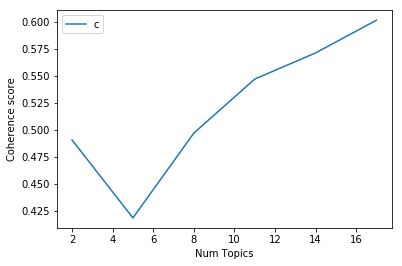

<Figure size 432x288 with 0 Axes>

In [36]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=20, step=3)
# Show graph
import matplotlib.pyplot as plt
limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
plt.savefig('Topic_Research_doc_coherence.png', dpi=80)

In [34]:
#plt.figimage(x, coherence_values)
#plt.show()

<Figure size 432x288 with 0 Axes>

In [42]:
topics = ldamodel.print_topics(num_words=4)
print(topics)
for topic in topics:
    print(topic)

[(0, '0.056*"telling" + 0.056*"create" + 0.056*"growing" + 0.056*"environment"'), (1, '0.073*"control" + 0.049*"hybrid" + 0.026*"design" + 0.026*"continuous"'), (2, '0.033*"architecture" + 0.033*"transport" + 0.033*"light" + 0.033*"subsurface"'), (3, '0.041*"power" + 0.041*"analysis" + 0.041*"multiprocessor" + 0.041*"corruption"'), (4, '0.059*"network" + 0.059*"detecting" + 0.059*"segment" + 0.059*"tolerant"'), (5, '0.062*"large" + 0.062*"distance" + 0.062*"mining" + 0.062*"base"'), (6, '0.049*"power" + 0.049*"approach" + 0.049*"building" + 0.049*"orient"'), (7, '0.009*"architecture" + 0.009*"network" + 0.009*"model" + 0.009*"touch"'), (8, '0.009*"network" + 0.009*"switch" + 0.009*"architecture" + 0.009*"touch"'), (9, '0.097*"network" + 0.051*"model" + 0.051*"delay" + 0.051*"interconnect"')]
(0, '0.056*"telling" + 0.056*"create" + 0.056*"growing" + 0.056*"environment"')
(1, '0.073*"control" + 0.049*"hybrid" + 0.026*"design" + 0.026*"continuous"')
(2, '0.033*"architecture" + 0.033*"tran